In [76]:
# %matplotlib widget #requires package ipympl installed, for interactive plots.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import lmfit

from scipy.optimize import curve_fit

np.set_printoptions(precision=4,threshold =9,suppress=True)  #Compact display of arrays.

In [77]:
datasets = ['nul_', '6.585_', '8.576_', '10.195_', '12.525_', '14.095_']
nuldata = [pd.read_csv(r"C:\Users\study\Documents\Hydrogel_Ilja_Jarod\Data\\"+ 'nul_' +str(idx)+ ".mqa", sep="\t", decimal=',') for idx in range(1,6)]
data6585 = [pd.read_csv(r"C:\Users\study\Documents\Hydrogel_Ilja_Jarod\Data\\"+ '6.585_' +str(idx)+ ".mqa", sep="\t", decimal=',') for idx in range(1,6)]
data8576 = [pd.read_csv(r"C:\Users\study\Documents\Hydrogel_Ilja_Jarod\Data\\"+ '8.576_' +str(idx)+ ".mqa", sep="\t", decimal=',') for idx in range(1,6)]
data10195 = [pd.read_csv(r"C:\Users\study\Documents\Hydrogel_Ilja_Jarod\Data\\"+ '10.195_' +str(idx)+ ".mqa", sep="\t", decimal=',') for idx in range(1,6)]
data12525 = [pd.read_csv(r"C:\Users\study\Documents\Hydrogel_Ilja_Jarod\Data\\"+ '12.525_' +str(idx)+ ".mqa", sep="\t", decimal=',') for idx in range(1,6)]
data14095 = [pd.read_csv(r"C:\Users\study\Documents\Hydrogel_Ilja_Jarod\Data\\"+ '14.095_' +str(idx)+ ".mqa", sep="\t", decimal=',') for idx in range(1,6)]
dataplaatjehalf = [pd.read_csv(r"C:\Users\study\Documents\Hydrogel_Ilja_Jarod\Data\\"+ 'plaatje_' +str(idx)+ ".mqa", sep="\t", decimal=',') for idx in range(1,3)]
dataplaatjedriekwart = [pd.read_csv(r"C:\Users\study\Documents\Hydrogel_Ilja_Jarod\Data\\"+ 'plaatjedriekwart_' +str(idx)+ ".mqa", sep="\t", decimal=',') for idx in range(1,3)]
dataplaatjeheel = [pd.read_csv(r"C:\Users\study\Documents\Hydrogel_Ilja_Jarod\Data\\"+ 'plaatjeheel_' +str(idx)+ ".mqa", sep="\t", decimal=',') for idx in range(1,2)]
datazwaar = [pd.read_csv(r"C:\Users\study\Documents\Hydrogel_Ilja_Jarod\Data\\"+ 'dag2_14_' +str(idx)+ ".mqa", sep="\t", decimal=',') for idx in range(1,4)]
data2nul = [pd.read_csv(r"C:\Users\study\Documents\Hydrogel_Ilja_Jarod\Data\\"+ 'dag2_nul_' +str(idx)+ ".mqa", sep="\t", decimal=',') for idx in range(1,6)]
data2tien = [pd.read_csv(r"C:\Users\study\Documents\Hydrogel_Ilja_Jarod\Data\\"+ 'dag2_10_' +str(idx)+ ".mqa", sep="\t", decimal=',') for idx in range(1,5)]
data2zes= [pd.read_csv(r"C:\Users\study\Documents\Hydrogel_Ilja_Jarod\Data\\"+ 'dag2_6_' +str(idx)+ ".mqa", sep="\t", decimal=',') for idx in range(2,6)]

In [78]:
nulmetingen = [(data['Time'].astype(float), data['Point #1.Y'].astype(float) * 1/50) for data in nuldata]
meting6585 = [(data['Time'].astype(float), data['Point #1.Y'].astype(float) * 1/50) for data in data6585]
meting8576 = [(data['Time'].astype(float), data['Point #1.Y'].astype(float) * 1/50) for data in data8576]
meting10195 = [(data['Time'].astype(float), data['Point #1.Y'].astype(float) * 1/50) for data in data10195]
meting12525 = [(data['Time'].astype(float), data['Point #1.Y'].astype(float) * 1/50) for data in data12525]
meting14095 = [(data['Time'].astype(float), data['Point #1.Y'].astype(float) * 1/50) for data in data14095]
metingplaatjehalf = [(data['Time'].astype(float), data['Point #1.Y'].astype(float) * 1/50) for data in dataplaatjehalf]
metingplaatjedriekwart = [(data['Time'].astype(float), data['Point #1.Y'].astype(float) * 1/50) for data in dataplaatjedriekwart]
metingplaatjeheel = [(data['Time'].astype(float), data['Point #1.Y'].astype(float) * 1/50) for data in dataplaatjeheel]
metingzwaar = [(data['Time'].astype(float), data['Point #1.Y'].astype(float) * 1/50) for data in datazwaar]
meting2nul = [(data['Time'].astype(float), data['Point #1.Y'].astype(float) * 1/50) for data in data2nul]
meting2tien = [(data['Time'].astype(float), data['Point #1.Y'].astype(float) * 1/50) for data in data2tien]
meting2zes = [(data['Time'].astype(float), data['Point #1.Y'].astype(float) * 1/50) for data in data2zes]

metingen = [nulmetingen,meting6585, meting8576, meting10195, meting12525, meting14095]

In [79]:
def slope(t, D):
    placeholder = D*np.sqrt(t)
    return placeholder

def lijn(t,D, b):
    placeholder = D*t+b
    return placeholder

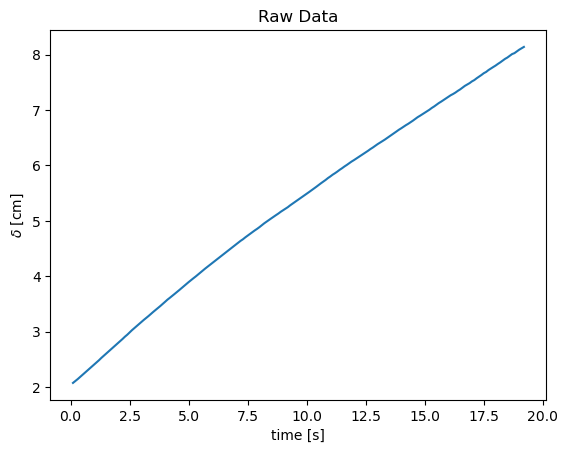

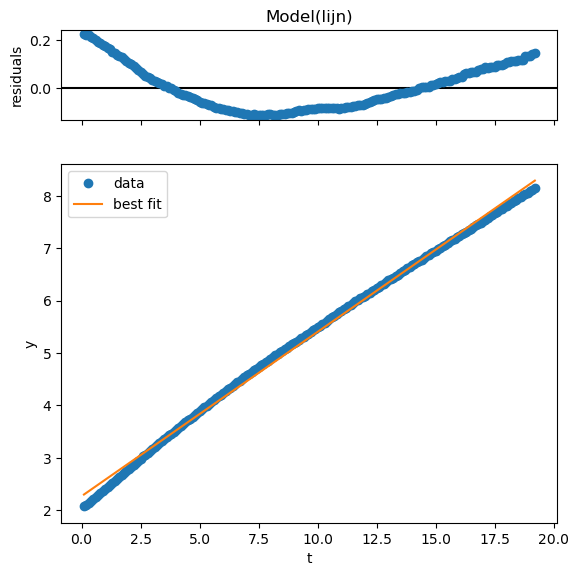

In [88]:
import lmfit
import matplotlib.pyplot as plt
import numpy as np

# Define your data
random_time = metingen[1][0][0][1:]
random_plaats = metingen[1][0][1][1:]

plt.plot(random_time, random_plaats)
plt.ylabel("$\delta$ [cm]")
plt.xlabel("time [s]")
plt.title('Raw Data')
plt.savefig("Raw_data.png")

# Create the model
model = lmfit.Model(lijn)

# Provide initial values for parameters as scalars
params = model.make_params(D=1, b=0)

# Fit the model to the data
result = model.fit(random_plaats, params, t=random_time)

# Print fit report
# print(result.fit_report())

# Plot the data and the fit
result.plot(datafmt='o',)

# plt.show()

# Display the result
print(result)
# x_v = []
# y_v = []
# for x in np.arange(0.18, 0.30, 0.001):
#     x_v.append(x)
#     y_v.append(2.3136e-04 * (1.1468e+12) ** x)
# plt.xlabel(r'Stress $\sigma$ [Pa]')
# plt.ylabel('Velocity D [cm/s]')
# plt.title('Velocity depending on stress')
# plt.plot(x_v, y_v, color='orange', label='Fit')
# plt.errorbar(stress, gemiddeldes, xerr=stress_error,yerr=y_error, fmt='o', label='Data')
# plt.legend()

In [81]:
gewichten = [3.536, 6.584, 8.576, 10.195, 12.526, 14.093]
dingen = [meting2nul, meting2zes, meting2tien, metingzwaar]

# Caculated by determining thrice the standard deviation on the weighed weight
weight_error = [0.001469693845669745, 0.0018973665961016612, 0.0014696938456690923, 0.004647580015448388, 0.0023999999999986697, 0.002683281573000644]
weight_error = np.asarray(weight_error)
weight_error = weight_error * 1e-3

<ErrorbarContainer object of 3 artists>

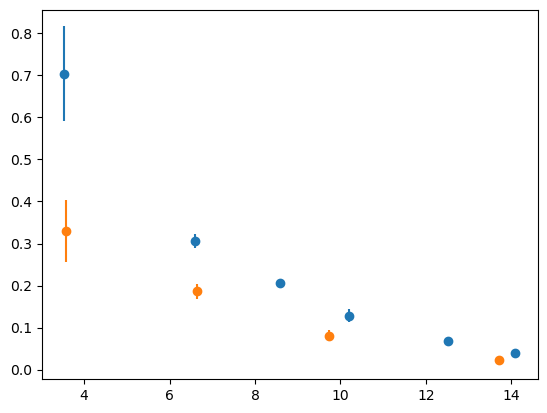

In [82]:
gemiddeldes = []
gewichten_day2 = [3.585, 6.632, 9.727, 13.710]
y_error = []
for gewicht in metingen:
    gemiddelde = []
    for meting in gewicht:
        x = int(len(meting[0])*0.45)
        model = lmfit.Model(lijn)
        parameters = model.make_params(D=0.06,b=1.5)
        result = model.fit(meting[1][x:], parameters, t=meting[0][x:])
        gemiddelde.append(result.params['D'].value)
    gemiddeldes.append(sum(gemiddelde)/len(gewicht))
    y_error.append(2*(np.std(gemiddelde)/np.sqrt(len(gewicht))))

gemiddeldes1 = []
y_error1 = []
for gewicht in dingen:
    gemiddelde = []
    for meting in gewicht:
        x = int(len(meting[0])*0.45)
        model = lmfit.Model(lijn)
        parameters = model.make_params(D=0.06,b=1.5)
        result = model.fit(meting[1][x:], parameters, t=meting[0][x:])
        gemiddelde.append(result.params['D'].value)
    gemiddeldes1.append(sum(gemiddelde)/len(gewicht))
    y_error1.append(2*(np.std(gemiddelde)/np.sqrt(len(gewicht))))


y_error = np.asarray(y_error)
y_error1 = np.asarray(y_error1)
plt.errorbar(gewichten, gemiddeldes, yerr=y_error, fmt='o')
plt.errorbar([3.585, 6.632, 9.727, 13.710], gemiddeldes1, yerr=y_error1, fmt='o')

In [83]:
gewichten = np.array([3.536, 6.584, 8.576, 10.195, 12.526, 14.093])
gewichten = gewichten * 1e-3
gewichten_day2 = np.asarray(gewichten_day2)
gewichten_day2 = gewichten_day2 * 1e-3

diameter = np.array([39.85,39.98,39.84,39.94,39.97,40.07])
r = (diameter * 1e-3)/2
r_average = np.mean(r)
r_error = 3*np.std(r)

In [84]:
# Massa van de pingpongballen omrekenen naar stress
# Stress = Buoyancy force - gravity = rho_packing * g * V - m * g

stress = []
stress_error = []
for x in range(0, len(gewichten)):
    stress.append(9.81 * (-gewichten[x] + 998.2 * (4/3) * np.pi * r_average**3))
    stress_error.append(9.81 * (-(gewichten[x]+ weight_error[x]) + 998.2 * (4/3) * np.pi * (r_average + r_error)**3)- 9.81 * (-gewichten[x] + 998.2 * (4/3) * np.pi * r_average**3))


stress = np.asarray(stress)
print(f"stress = {stress}")
print(f"gemiddeldes = {gemiddeldes}")
# plt.errorbar(stress, gemiddeldes, xerr=stress_error,yerr=y_error, fmt='o')

stress = [0.292  0.2621 0.2426 0.2267 0.2038 0.1885]
gemiddeldes = [0.7044237356437475, 0.30706209617087116, 0.20563513380955914, 0.12872920076131256, 0.06739276138495129, 0.03870550090805906]


[[Model]]
    Model(formula)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 165
    # data points      = 6
    # variables        = 2
    chi-square         = 7.82235991
    reduced chi-square = 1.95558998
    Akaike info crit   = 5.59136091
    Bayesian info crit = 5.17487985
    R-squared          = -24.7282475
[[Variables]]
    a:  2.3136e-04 +/- 8.4102e-05 (36.35%) (init = 0.01)
    b:  1.1468e+12 +/- 1.7220e+12 (150.16%) (init = 10000)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = -0.9956
[[Model]]
    Model(formula)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 158
    # data points      = 4
    # variables        = 2
    chi-square         = 2.11895331
    reduced chi-square = 1.05947665
    Akaike info crit   = 1.45851153
    Bayesian info crit = 0.23110025
    R-squared          = -37.7993845
[[Variables]]
    a:  1.1255e-04 +/- 7.1404e-05 (63.44%) (init = 0.01)
    b:  1.5821e+12 +/- 3.9678e+1

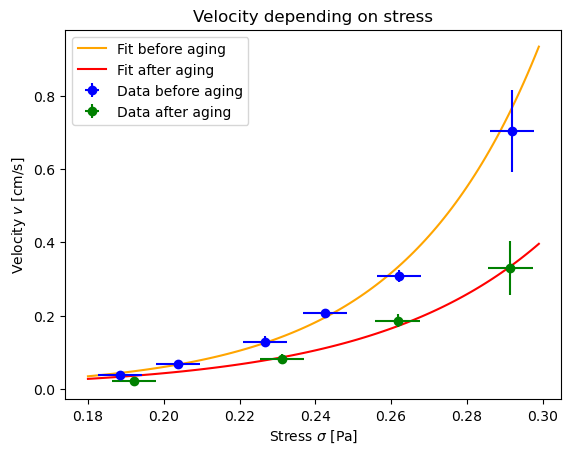

In [87]:
import lmfit
import matplotlib.pyplot as plt
import numpy as np

def formula(x, a, b):
    return a * b**x

# Define your data
stress = np.array([0.292, 0.2621, 0.2426, 0.2267, 0.2038, 0.1885])
gemiddeldes = np.array([0.7044237356437475, 0.30706209617087116, 0.20563513380955914, 0.12872920076131256, 0.06739276138495129, 0.03870550090805906])

stress_day2 = np.array([0.2915, 0.2617, 0.2313, 0.1922])
stress_error_day2 = [0.005838861418335006, 0.005834665948653228, 0.0058388614183349785, 0.005807686355009445]

# Create the model
model = lmfit.Model(formula)

# Provide initial values for parameters as scalars
params = model.make_params(a=0.01, b=10000)

# Fit the model to the data
result = model.fit(gemiddeldes, params, x=stress, weights=1/y_error)

# Print fit report
print(result.fit_report())

# Plot the data and the fit
# result.plot(datafmt='o')
# plt.ylabel("Terminale snelheid")
# plt.show()
result_day2 = model.fit(gemiddeldes1, params, x=stress_day2, weights=1/y_error1)
print(result_day2.fit_report())
# Display the result

x_v = []
y_v = []
for x in np.arange(0.18, 0.30, 0.001):
    x_v.append(x)
    y_v.append(2.3136e-04 * (1.1468e+12) ** x)

x_v2 = []
y_v2 = []
for x in np.arange(0.18, 0.30, 0.001):
    x_v2.append(x)
    y_v2.append(4.7494e-04 * (5.8628e+09) ** x)

plt.xlabel(r'Stress $\sigma$ [Pa]')
plt.ylabel(r'Velocity $v$ [cm/s]')
plt.title('Velocity depending on stress')
plt.plot(x_v, y_v, color='orange', label='Fit before aging')
plt.plot(x_v2,y_v2, color='red', label='Fit after aging')
plt.errorbar(stress, gemiddeldes, xerr=stress_error,yerr=y_error, fmt='o', color='blue',label='Data before aging')
plt.errorbar(stress_day2, gemiddeldes1, xerr=stress_error_day2,yerr=y_error1, fmt='o', color='green',label='Data after aging')
plt.legend()
plt.savefig("Eindgrafiek-beide-dagen.png")